## question 2
**Accuracy** measures the proportion of correct predictions (both positives and negatives) out of all cases. It’s useful for balanced datasets with equal error costs.  

**Sensitivity** measures the proportion of actual positives correctly identified, focusing on minimizing false negatives. It’s critical in scenarios like disease screening.  

**Specificity** measures the proportion of actual negatives correctly identified, prioritizing minimal false positives. It’s important for confirmatory tests like drug testing.  

**Precision** measures the proportion of correct positive predictions, reducing false positives. It’s key in applications like spam detection.  

Accuracy is best applied to scenarios like general disease diagnosis, where the dataset is balanced and the cost of false positives and false negatives is similar. Sensitivity is crucial in cases like cancer screening, where identifying all actual positives is critical to avoid severe consequences from false negatives. Specificity is most relevant in situations like drug testing in athletes, where minimizing false positives is essential to prevent wrongful accusations. Finally, precision is important in contexts such as spam email detection, where ensuring that positive predictions (e.g., flagged spam) are correct helps avoid falsely classifying legitimate emails as spam.

In [8]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

## Question 4

Training set size: 248
Testing set size: 62


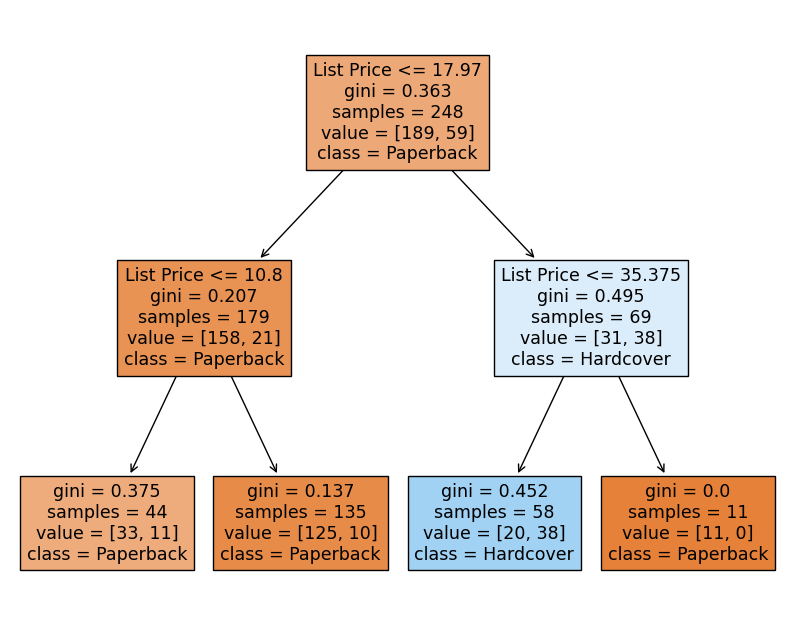

In [9]:

# Filter out rows with missing values
ab_reduced_noNaN = ab.dropna()

# Split the data into training (80%) and testing (20%) sets
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the number of observations in each set
print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Testing set size: {len(ab_reduced_noNaN_test)}")

# Prepare target and feature variables for training
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X_train = ab_reduced_noNaN_train[['List Price']]

# Initialize and train the DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the trained classification tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)
plt.show()

# Explain the predictions made by the fitted model


## question 6

Decision Tree (clf) Metrics:
Sensitivity: 0.89
Specificity: 0.91
Accuracy: 0.90

Second Decision Tree (clf2) Metrics:
Sensitivity: 0.74
Specificity: 0.93
Accuracy: 0.87


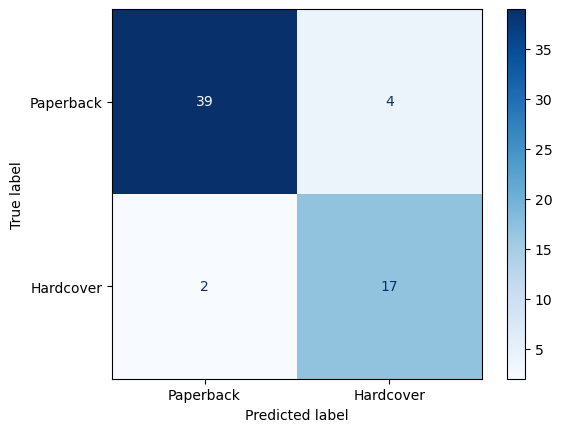

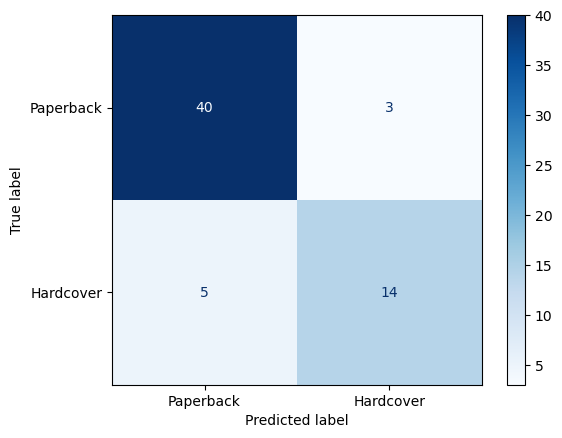

In [10]:
# Prepare target variable for testing
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']
X_test = ab_reduced_noNaN_test[['List Price']]

# Predict with clf (Decision Tree model)
y_pred_clf = clf.predict(X_test)

# Optionally, train a second model (clf2) if not already defined
# For illustration, let's assume clf2 is another DecisionTreeClassifier with a different max_depth
clf2 = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf2.fit(X_train, y_train)
y_pred_clf2 = clf2.predict(X_test)

# Confusion Matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paperback', 'Hardcover'])
cm_disp_clf.plot(cmap='Blues')

# Confusion Matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
cm_disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paperback', 'Hardcover'])
cm_disp_clf2.plot(cmap='Blues')

# Calculate Sensitivity, Specificity, and Accuracy for clf
tp_clf = cm_clf[1, 1]  # True Positives (Hardcover)
tn_clf = cm_clf[0, 0]  # True Negatives (Paperback)
fp_clf = cm_clf[0, 1]  # False Positives
fn_clf = cm_clf[1, 0]  # False Negatives

sensitivity_clf = tp_clf / (tp_clf + fn_clf)
specificity_clf = tn_clf / (tn_clf + fp_clf)
accuracy_clf = (tp_clf + tn_clf) / np.sum(cm_clf)

# Calculate Sensitivity, Specificity, and Accuracy for clf2
tp_clf2 = cm_clf2[1, 1]  # True Positives (Hardcover)
tn_clf2 = cm_clf2[0, 0]  # True Negatives (Paperback)
fp_clf2 = cm_clf2[0, 1]  # False Positives
fn_clf2 = cm_clf2[1, 0]  # False Negatives

sensitivity_clf2 = tp_clf2 / (tp_clf2 + fn_clf2)
specificity_clf2 = tn_clf2 / (tn_clf2 + fp_clf2)
accuracy_clf2 = (tp_clf2 + tn_clf2) / np.sum(cm_clf2)

# Report metrics for clf and clf2
print(f"Decision Tree (clf) Metrics:")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}\n")

print(f"Second Decision Tree (clf2) Metrics:")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")


## question 7
The differences in the confusion matrices arise because the first model uses only `List Price`, which may not be as predictive, leading to more errors. The second model incorporates more features (`NumPages`, `Thick`, `List Price`), likely improving accuracy. The confusion matrices for `clf` and `clf2` are better because they evaluate performance on the test set, avoiding overfitting to the training data and providing a more realistic assessment of model generalization.

chatbox: https://chatgpt.com/share/673f57de-da34-8002-aec6-206221d9a1b9